In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [11]:
# Step 1: Load the Iris dataset
data = pd.read_csv("Iris.csv")
print(data.head())

   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa


In [12]:
# Step 2: Data Preprocessing
# Drop the 'Species' column as it's the target we are clustering without labels
X = data.drop(columns=['Species', 'Id'])  # Assuming 'Id' is unnecessary for clustering

In [13]:
# Check if there are missing values
print("Missing values in the dataset:\n", X.isnull().sum())

Missing values in the dataset:
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64


In [14]:

# Step 3: Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Step 4: Use the Elbow Method to determine the optimal number of clusters
inertia = []  # List to store inertia for different k values

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

d:\Installations\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Installations\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Installations\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
d:\Installations\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Wi

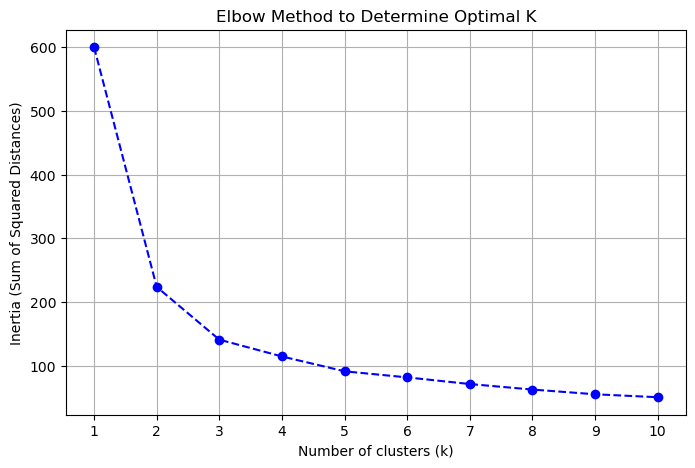

In [16]:
# Step 5: Plot the Elbow Graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--', color='b')
plt.title('Elbow Method to Determine Optimal K')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.xticks(np.arange(1, 11, 1))
plt.show()

In [17]:
# Step 6: Apply K-Means Clustering with the optimal number of clusters
optimal_k = 3  # Based on the elbow method, we use 3 clusters
kmeans = KMeans(n_clusters=optimal_k, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add the cluster predictions to the original dataframe
data['Cluster'] = y_kmeans

d:\Installations\ANACONDA\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


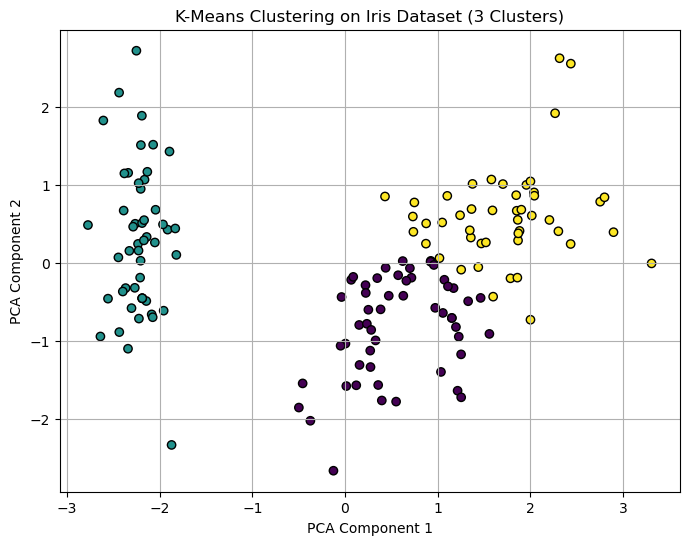

In [18]:
# Step 7: Visualize the Clusters using PCA (2D visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a scatter plot of the two PCA components
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_kmeans, cmap='viridis', marker='o', edgecolor='k')
plt.title('K-Means Clustering on Iris Dataset (3 Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.grid(True)
plt.show()


In [19]:
inertia

[600.0,
 223.73200573676348,
 140.96581663074699,
 114.61788585776677,
 91.29544474066981,
 81.75658187204954,
 71.31982095188795,
 62.651767150319046,
 55.261841196034645,
 50.62316902954044]